# Bangkok AirBnb Exploratory Data Analysis (EDA)

## Analysis - Airbnb Reviews

In [77]:
import pandas as pd
dfBK = pd.read_csv("BKclean_data.csv")
dfBK.head(5)

,listing_id,name,neighborhood_overview,host_id,host_since,host_about,host_response_time,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,beds,price,availability_30,availability_60,availability_365,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,id,date,comments,timestamp,host_since1,host_exp_month
0,27934,Condo in Samsen Nai ¬∑ ‚òÖ4.85 ¬∑ 1 bedroom ¬∑...,it is very center of bangkok and easy access t...,120437,5/8/10,hi all i am nuttee patranavik from bangkok t...,within an hour,f,2,2,t,Ratchathewi,13.75983,100.54134,Entire home/apt,3,1.5 baths,1.0,"$1,903.00",0,24,329,64,0,4.85,4.95,4.81,4.91,4.66,4.75,2,58609251.0,1/3/16,we had a great stay at nuttee s she was graci...,2016-01-03,2010-05-08,68
1,27934,Condo in Samsen Nai ¬∑ ‚òÖ4.85 ¬∑ 1 bedroom ¬∑...,it is very center of bangkok and easy access t...,120437,5/8/10,hi all i am nuttee patranavik from bangkok t...,within an hour,f,2,2,t,Ratchathewi,13.75983,100.54134,Entire home/apt,3,1.5 baths,1.0,"$1,903.00",0,24,329,64,0,4.85,4.95,4.81,4.91,4.66,4.75,2,59402025.0,1/10/16,nuttee was a great host very accommodating an...,2016-01-10,2010-05-08,68
2,27934,Condo in Samsen Nai ¬∑ ‚òÖ4.85 ¬∑ 1 bedroom ¬∑...,it is very center of bangkok and easy access t...,120437,5/8/10,hi all i am nuttee patranavik from bangkok t...,within an hour,f,2,2,t,Ratchathewi,13.75983,100.54134,Entire home/apt,3,1.5 baths,1.0,"$1,903.00",0,24,329,64,0,4.85,4.95,4.81,4.91,4.66,4.75,2,62804653.0,2/17/16,myself and my mother stayed at nuttee s apartm...,2016-02-17,2010-05-08,69
3,27934,Condo in Samsen Nai ¬∑ ‚òÖ4.85 ¬∑ 1 bedroom ¬∑...,it is very center of bangkok and easy access t...,120437,5/8/10,hi all i am nuttee patranavik from bangkok t...,within an hour,f,2,2,t,Ratchathewi,13.75983,100.54134,Entire home/apt,3,1.5 baths,1.0,"$1,903.00",0,24,329,64,0,4.85,4.95,4.81,4.91,4.66,4.75,2,73254511.0,5/7/16,i enjoyed staying in this apartment it is cl...,2016-05-07,2010-05-08,72
4,27934,Condo in Samsen Nai ¬∑ ‚òÖ4.85 ¬∑ 1 bedroom ¬∑...,it is very center of bangkok and easy access t...,120437,5/8/10,hi all i am nuttee patranavik from bangkok t...,within an hour,f,2,2,t,Ratchathewi,13.75983,100.54134,Entire home/apt,3,1.5 baths,1.0,"$1,903.00",0,24,329,64,0,4.85,4.95,4.81,4.91,4.66,4.75,2,178182748.0,8/5/17,very clean and nice room,2017-08-05,2010-05-08,87


In [26]:
### Creating a DTM
from sklearn.feature_extraction.text import CountVectorizer
import nltk

nltk_stopwords = nltk.corpus.stopwords.words("english") # Create a list of stop words from nltk (for the vectorizer to remove)
nltk_stopwords = nltk_stopwords + ["br"]
vectorizer = CountVectorizer(stop_words = nltk_stopwords, 
                                   max_df = 0.99,
                                   min_df = 0.01)

DTM_BK = vectorizer.fit_transform(dfBK["comments"])

#Check your answer:
DTM_BK.shape

(246809, 391)

#### Term Frequency - Reviews

In [27]:
## Get term frequency ##

from collections import Counter              # for word counting

dffreq = pd.DataFrame({'Term': vectorizer.get_feature_names_out(),
                   'Frequency': DTM_BK.sum(axis=0).tolist()[0]
                  })

dffreq.sort_values(by="Frequency",inplace=True,ascending=False)
dffreq.reset_index(inplace=True,drop=True)

#Check your answer:
dffreq.head(10)

,Term,Frequency
0,place,139349
1,great,116718
2,stay,112827
3,location,77175
4,clean,75613
5,good,71645
6,nice,70638
7,host,69640
8,apartment,59863
9,room,52903


#### TFIDF - Reviews

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer2 = TfidfVectorizer(stop_words = nltk_stopwords, ngram_range = (2,2), max_df = 0.99, min_df = 0.01)
DTM_BK2 = vectorizer2.fit_transform(dfBK["comments"])
pd.DataFrame(DTM_BK2.toarray(), columns = vectorizer2.get_feature_names_out())

DTM_BK2.shape

(246784, 80)

In [18]:
dffreq = pd.DataFrame({'Term': vectorizer2.get_feature_names_out(),
                   'Frequency': DTM_BK2.sum(axis=0).tolist()[0]
                  })

dffreq.sort_values(by="Frequency",inplace=True,ascending=False)
dffreq.reset_index(inplace=True,drop=True)

#Check your answer:
dffreq.head(10)

,Term,Frequency
0,great location,10273.487187
1,great place,9624.070226
2,place stay,9406.417519
3,highly recommend,7142.090903
4,good location,6940.933588
5,great host,6071.759956
6,nice place,5583.809701
7,great stay,5577.787112
8,walking distance,5567.020013
9,come back,5495.453701


### Sentiment Scores - BK Airbnb Reviews

In [78]:

from textblob import TextBlob
dfBK["comments_TextBlob"]=[TextBlob(s).sentiment.polarity for s in dfBK.comments]

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()    #Initialize VADER sentiment analyzer
dfBK["comments_VADER"]=[analyzer.polarity_scores(s)['compound'] for s in dfBK.comments]

#Check you answer
dfBK.head(5)

,listing_id,name,neighborhood_overview,host_id,host_since,host_about,host_response_time,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,beds,price,availability_30,availability_60,availability_365,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,id,date,comments,timestamp,host_since1,host_exp_month,comments_TextBlob,comments_VADER
0,27934,Condo in Samsen Nai ¬∑ ‚òÖ4.85 ¬∑ 1 bedroom ¬∑...,it is very center of bangkok and easy access t...,120437,5/8/10,hi all i am nuttee patranavik from bangkok t...,within an hour,f,2,2,t,Ratchathewi,13.75983,100.54134,Entire home/apt,3,1.5 baths,1.0,"$1,903.00",0,24,329,64,0,4.85,4.95,4.81,4.91,4.66,4.75,2,58609251.0,1/3/16,we had a great stay at nuttee s she was graci...,2016-01-03,2010-05-08,68,0.484286,0.9382
1,27934,Condo in Samsen Nai ¬∑ ‚òÖ4.85 ¬∑ 1 bedroom ¬∑...,it is very center of bangkok and easy access t...,120437,5/8/10,hi all i am nuttee patranavik from bangkok t...,within an hour,f,2,2,t,Ratchathewi,13.75983,100.54134,Entire home/apt,3,1.5 baths,1.0,"$1,903.00",0,24,329,64,0,4.85,4.95,4.81,4.91,4.66,4.75,2,59402025.0,1/10/16,nuttee was a great host very accommodating an...,2016-01-10,2010-05-08,68,0.455556,0.7783
2,27934,Condo in Samsen Nai ¬∑ ‚òÖ4.85 ¬∑ 1 bedroom ¬∑...,it is very center of bangkok and easy access t...,120437,5/8/10,hi all i am nuttee patranavik from bangkok t...,within an hour,f,2,2,t,Ratchathewi,13.75983,100.54134,Entire home/apt,3,1.5 baths,1.0,"$1,903.00",0,24,329,64,0,4.85,4.95,4.81,4.91,4.66,4.75,2,62804653.0,2/17/16,myself and my mother stayed at nuttee s apartm...,2016-02-17,2010-05-08,69,0.195011,0.9065
3,27934,Condo in Samsen Nai ¬∑ ‚òÖ4.85 ¬∑ 1 bedroom ¬∑...,it is very center of bangkok and easy access t...,120437,5/8/10,hi all i am nuttee patranavik from bangkok t...,within an hour,f,2,2,t,Ratchathewi,13.75983,100.54134,Entire home/apt,3,1.5 baths,1.0,"$1,903.00",0,24,329,64,0,4.85,4.95,4.81,4.91,4.66,4.75,2,73254511.0,5/7/16,i enjoyed staying in this apartment it is cl...,2016-05-07,2010-05-08,72,0.366667,0.9751
4,27934,Condo in Samsen Nai ¬∑ ‚òÖ4.85 ¬∑ 1 bedroom ¬∑...,it is very center of bangkok and easy access t...,120437,5/8/10,hi all i am nuttee patranavik from bangkok t...,within an hour,f,2,2,t,Ratchathewi,13.75983,100.54134,Entire home/apt,3,1.5 baths,1.0,"$1,903.00",0,24,329,64,0,4.85,4.95,4.81,4.91,4.66,4.75,2,178182748.0,8/5/17,very clean and nice room,2017-08-05,2010-05-08,87,0.538333,0.7233


#### Sentiment Visualization - BK Airbnb Reviews

In [80]:
# Set time variable
dfBK.dropna(subset=["date"], inplace = True)
dfBK["timestamp"] = pd.to_datetime(dfBK["date"], format="%m/%d/%y")

dfBK.sort_values(by = ["timestamp"], ascending = True, inplace = True)
dfBK.reset_index(drop = True, inplace = True)

# CHeck time stamp
print(dfBK["timestamp"][0:15])

0    2016-01-01
1    2016-01-01
2    2016-01-01
3    2016-01-01
4    2016-01-01
5    2016-01-01
6    2016-01-01
7    2016-01-01
8    2016-01-01
9    2016-01-01
10   2016-01-01
11   2016-01-01
12   2016-01-01
13   2016-01-01
14   2016-01-01
Name: timestamp, dtype: datetime64[ns]


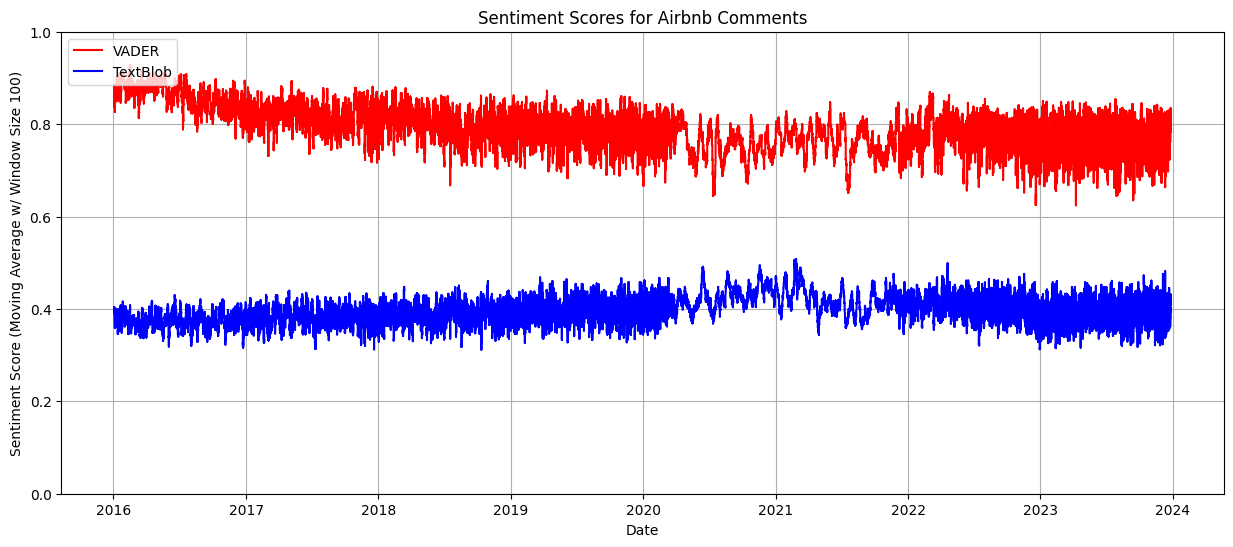

In [30]:
# Visualizing sentiment - Reviews
import matplotlib.pyplot as plt                      # a library for visualization
# inline display of plots
%matplotlib inline

plt.figure(figsize=(15, 6))

plt.plot(dfBK.timestamp, dfBK.comments_VADER.rolling(window=100).mean(), "-r", label = "VADER")
plt.plot(dfBK.timestamp, dfBK.comments_TextBlob.rolling(window=100).mean(), "-b", label = "TextBlob")

plt.ylim(0, 1)
plt.legend(loc = "upper left")
plt.title("Sentiment Scores for Airbnb Comments")
plt.xlabel("Date")
plt.ylabel("Sentiment Score (Moving Average w/ Window Size 100)")
plt.grid(axis = 'both')

plt.show()

### Sampling Data in 2023

In [81]:
start_date = pd.to_datetime("01/01/23")
end_date = pd.to_datetime("12/31/23")
dfBK2023 = dfBK[(dfBK["timestamp"] >= start_date) & (dfBK["timestamp"] <= end_date)]

# dfBK_sample = dfBK2023.sample(n = 10000)  # Can be used to further sample (randomly) the data in 2023

In [82]:
dfBKsample = dfBK2023.sample(n = 10000, random_state = 2024)

### Text Visualizations

#### Word Cloud - Reviews

In [27]:
from wordcloud import WordCloud
import nltk
from sklearn.feature_extraction.text import CountVectorizer

nltk_stopwords = nltk.corpus.stopwords.words("english") + ["br"]
vectorizer = CountVectorizer(stop_words=nltk_stopwords)

DTM_BK = vectorizer.fit_transform(dfBK["comments"])

dffreq = pd.DataFrame({'Term': vectorizer.get_feature_names_out(),
                   'Frequency': DTM_BK.sum(axis=0).tolist()[0]
                  })

dffreq.sort_values(by="Frequency",inplace=True,ascending=False)
dffreq.reset_index(inplace=True,drop=True)
dffreq.head(15)

,Term,Frequency
0,place,139375
1,great,116953
2,stay,112839
3,location,77186
4,clean,75616
5,good,71834
6,nice,70851
7,host,69664
8,apartment,59891
9,room,52918


In [28]:
# Generate dictionary for word cloud
dictfreq = dict(zip(dffreq.Term,dffreq.Frequency))


94

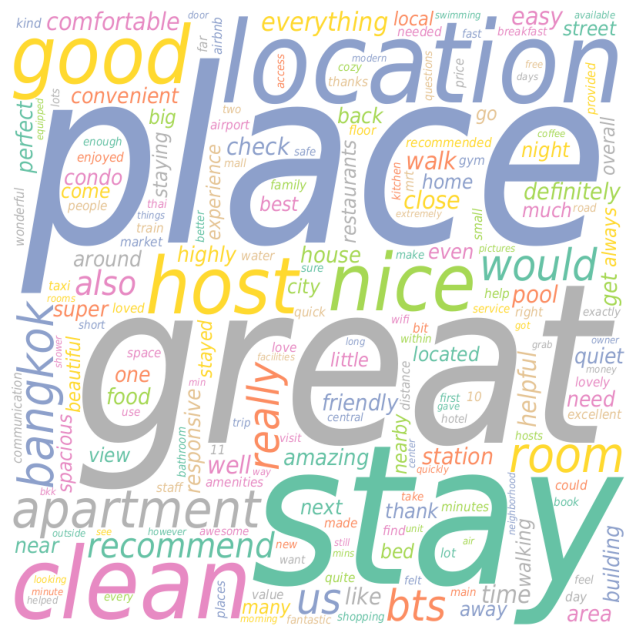

In [29]:
#Initialize a wordcloud object
wordcloud = WordCloud(width = 800, height = 800, 
                font_path="DejaVuSansCondensed-Oblique", 
                background_color ='white',
                prefer_horizontal=0.9,  #How often a term is put horizontally. 
                colormap='Set2', 
                random_state = 2021)
wordcloud.generate_from_frequencies(frequencies=dictfreq) 
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show() 

### Two-Mode Text Network

In [54]:
uniquehoods = dfBK["neighbourhood_cleansed"].unique()
print(uniquehoods)

['Chatu Chak' 'Vadhana' 'Sathon' 'Huai Khwang' 'Phra Nakhon' 'Bang Na'
 'Pra Wet' 'Khlong Toei' 'Parthum Wan' 'Khlong San' 'Pom Prap Sattru Phai'
 'Phaya Thai' 'Ratchathewi' 'Bang Khen' 'Bang Rak' 'Phra Khanong'
 'Bang Sue' 'Din Daeng' 'Chom Thong' 'Lat Krabang' 'Yan na wa'
 'Samphanthawong' 'Bangkok Yai' 'Bang Kapi' 'Bang Kho laen' 'Lak Si'
 'Suanluang' 'Thon buri' 'Dusit' 'Saphan Sung' 'Don Mueang' 'Taling Chan'
 'Rat Burana' 'Phasi Charoen' 'Khlong Sam Wa' 'Bueng Kum' 'Bangkok Noi'
 'Bang Khae' 'Nong Chok' 'Min Buri' 'Wang Thong Lang' 'Lat Phrao'
 'Thawi Watthana' 'Bang Khun thain' 'Bang Phlat' 'Sai Mai' 'Khan Na Yao'
 'Thung khru' 'Bang Bon' 'Nong Khaem']


In [39]:
## Prepare a dataframe for textnets package
# (textnets requires the documents' names given as the row index)
start_date = pd.to_datetime("07/01/23")
end_date = pd.to_datetime("12/31/23")
dfBK_net = dfBK[(dfBK["timestamp"] >= start_date) & (dfBK["timestamp"] <= end_date)]
dfBKsample_net = dfBK_net.sample(n=10000, random_state = 2021) 

dfBK_net = dfBK_net[["neighbourhood_cleansed", "comments"]]
dfBK_net.set_index("neighbourhood_cleansed", inplace = True)
dfBK_net

,comments
neighbourhood_cleansed,
Din Daeng,the condo was a perfect place to stay in bangk...
Khlong Toei,the rooftop pool was the best it was a great ...
Vadhana,i loved my stay here the condo is super comfo...
Phra Khanong,clean place host was very responsive very ni...
Vadhana,this unit 289 310 is just everything i look fo...
...,...
Khlong Toei,great location beautiful apartment kk was so...
Khlong Toei,great apartment and excellent host really fel...
Khlong Toei,great


#### Text Network for Sample of 10000 reviews (within 2023)

In [28]:
## Prepare a dataframe for textnets package
# (textnets requires the documents' names given as the row index)

dfBKsample_net = dfBKsample[["neighbourhood_cleansed", "comments"]]
dfBKsample_net.set_index("neighbourhood_cleansed", inplace = True)
dfBKsample_net

,comments
neighbourhood_cleansed,
Vadhana,the apartment was great actually it looked e...
Bangkok Yai,lived 4 days great offer sometimes noisy a...
Phra Nakhon,loved staying here and the massage place next ...
Bang Rak,highly recommended great host and place beau...
Phra Khanong,everything is good
...,...
Huai Khwang,fantastic place and friendly and welcoming hos...
Bang Kapi,khun new and khun polpat were very accomodatin...
Khlong San,great location right next to the motorcycle re...


In [29]:
# Create a corpus & DTM for the text network
import pandas as pd
import textnets as tn

corpus = tn.Corpus(dfBKsample_net["comments"])   # convert the text in the "comments" column into an object (called *corpus*)
DTM = corpus.tokenized()       # tokenize to convert it into a DTM (in textnet style)
DTM[0:20]

/home/tungo/.local/lib/python3.11/site-packages/textnets/corpus.py:99: UserWarning: There are 9954 duplicate labels. Concatenating documents.
  warn(f"There are {duplicated} duplicate labels. Concatenating documents.")


  0%|          | 0/46 [00:00<?, ?docs/s]

,term,n,term_weight
label,,,
Bang Kapi,a1,1,1.662758
Bang Kapi,able,1,0.231394
Bang Kapi,absolute,1,0.759668
Bang Kapi,absolutely,3,0.295956
Bang Kapi,ac,1,0.215600
Bang Kapi,access,2,0.280502
Bang Kapi,accommodating,2,0.530151
Bang Kapi,accommodation,3,0.175319
Bang Kapi,accomodating,1,0.621365


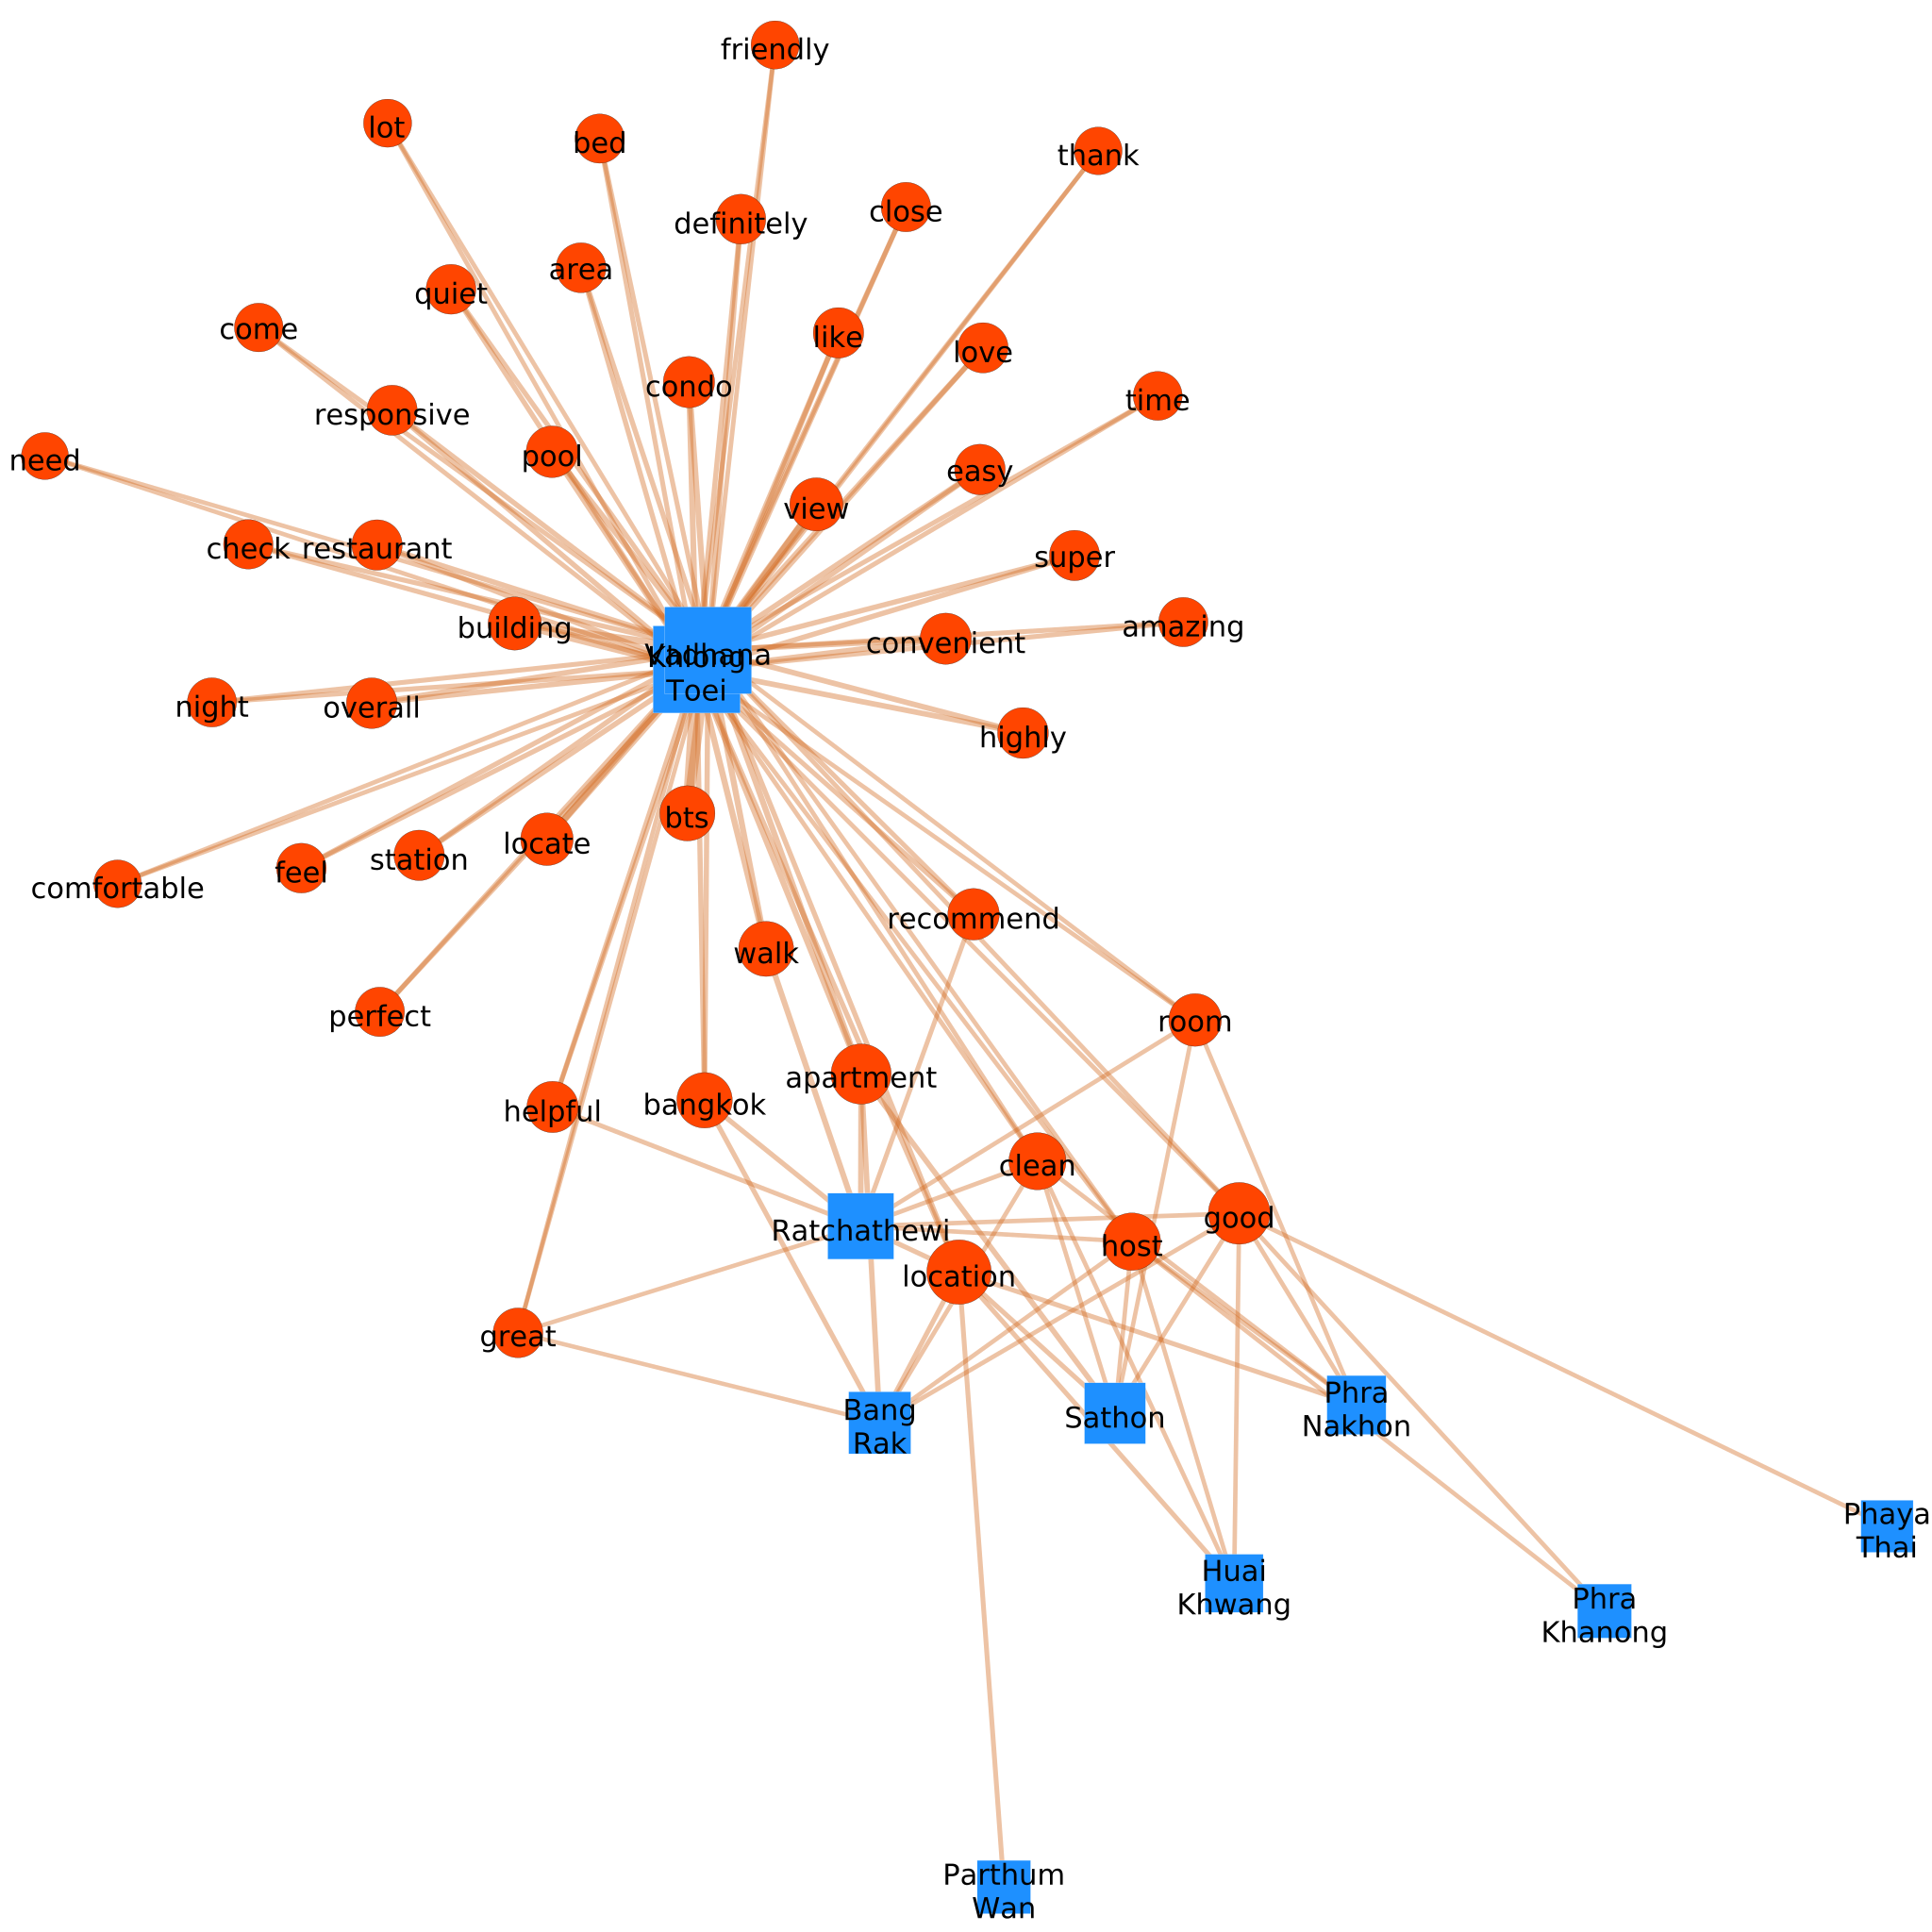

In [130]:
## Text Network (2-Mode)
tn.params["seed"] = 2024
DTM_small = DTM[(DTM["n"]>=115) & (DTM["term_weight"] > 0.1) & (DTM["term"] != "br" ) & (DTM["term"] != "s" )] # make the DTM smaller for better visualization ## only show terms with n > 80 AND TFIDF (term weight) > 0 
net = tn.Textnet(DTM_small)
net.plot(label_term_nodes=True,
        label_doc_nodes = True,
        show_clusters = True, 
        color_clusters = False, 
        vertex_size=60,
        vertex_label_size=32, 
        edge_width=7,           # Width of edges
        edge_label_size=10,      # Size of edge labels 
        edge_color="chocolate",     # Color of edges 
        edge_opacity=0.4,
        scale_nodes_by="birank",
        scale_edges_by="weight",
        bbox=[2150,2150],  
        target="BK_network2150.png")

## Analysis - For Neighborhood Overview & Host Info/About

#### Checking missing values

In [83]:
null_count_NO = dfBK['neighborhood_overview'].isnull().sum()
null_count_NO

64083

In [84]:
null_count_HA = dfBK['host_about'].isnull().sum()
null_count_HA

51783

#### Creating a dummy/binary variable indicating missingness in the 2 columns 

In [85]:
dfBK['neighborhood_overview_exists'] = pd.notnull(dfBK['neighborhood_overview']).astype(int)
dfBK['host_about_exists'] = pd.notnull(dfBK['host_about']).astype(int)
dfBK.head(10)

,listing_id,name,neighborhood_overview,host_id,host_since,host_about,host_response_time,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,beds,price,availability_30,availability_60,availability_365,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,id,date,comments,timestamp,host_since1,host_exp_month,comments_TextBlob,comments_VADER,neighborhood_overview_exists,host_about_exists
0,6723842,Rental unit in ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡...,NaN,35206013,6/7/15,hello i m bell from bangkok i m happy and ki...,within an hour,f,1,3,t,Bang Sue,13.806060,100.527810,Entire home/apt,3,1 bath,2.0,$950.00,2,16,263,130,0,4.88,4.91,4.92,4.93,4.53,4.86,1,58143460.0,1/1/16,very nice place in a new condo the place is r...,2016-01-01,2015-06-07,7,0.234939,0.9306,0,1
1,1793000,Rental unit in Bangkok ¬∑ ‚òÖ4.85 ¬∑ 2 bedroom...,set around a stretch of the long phetchaburi ...,9407280,10/13/13,hi welcome to the airbnb profile of the du...,within a few hours,f,1,1,t,Vadhana,13.746680,100.561370,Entire home/apt,5,2 baths,4.0,"$5,001.00",20,32,293,290,0,4.85,4.90,4.88,4.87,4.73,4.75,1,58139934.0,1/1/16,stunning apartment with everything you need s...,2016-01-01,2013-10-13,27,0.600000,0.7579,1,1
2,5971468,Condo in Bangkok ¬∑ ‚òÖ4.23 ¬∑ 1 bedroom ¬∑ 1 ...,udomsuk is a nice neighborhood with many local...,15450556,5/13/14,hi i m cindy from bangkok thailand i love...,within a few hours,f,20,25,t,Bang Na,13.679290,100.612730,Entire home/apt,2,1 bath,1.0,$450.00,2,25,56,64,1,4.23,4.55,4.50,4.67,4.22,4.36,18,58189559.0,1/1/16,cindy is good in responding my enquiries and n...,2016-01-01,2014-05-13,20,0.194444,0.8338,1,1
3,1862377,Rental unit in Bangkok ¬∑ ‚òÖ4.68 ¬∑ 1 bedroom...,to locate our place search for sanctuary hous...,8214044,8/17/13,the sanctuary house project began in 2006 i h...,within an hour,f,10,11,t,Sathon,13.720630,100.546940,Entire home/apt,2,1 bath,1.0,$980.00,18,21,321,330,1,4.68,4.74,4.63,4.88,4.66,4.76,9,58228559.0,1/1/16,it s is a good choice to stay in bangkok qu...,2016-01-01,2013-08-17,29,0.367667,0.8969,1,1
4,8528401,Rental unit in Bangkok ¬∑ ‚òÖ4.90 ¬∑ 1 bedroom...,the neighborhood location are center at the ...,34705309,6/1/15,dear all welcome to smile thailand my name i...,NaN,f,1,3,f,Phaya Thai,13.793980,100.553270,Private room,2,1 bath,1.0,"$1,564.00",0,0,0,31,0,4.90,4.93,4.94,4.97,4.72,4.76,0,58204433.0,1/1/16,location is very good very nice rooms good q...,2016-01-01,2015-06-01,7,0.599129,0.9786,1,1
5,6902941,Condo in Bangkok ¬∑ ‚òÖ4.44 ¬∑ 2 bedrooms ¬∑ 3...,thai food restaurants and street food are near...,32644062,5/5/15,hi our room is well decorated as we planned t...,NaN,f,1,2,t,Ratchathewi,13.753670,100.533000,Entire home/apt,6,2 baths,3.0,"$3,000.00",0,0,269,36,0,4.44,4.78,4.47,4.81,4.72,4.56,1,58127390.0,1/1/16,great location a short walk from the bts lots...,2016-01-01,2015-05-05,8,0.149747,0.9231,1,1
6,5242781,Condo in Bangkok ¬∑ ‚òÖ4.42 ¬∑ Studio ¬∑ 1 bed...,udomsuk is a nice neighborhood with many local...,15450556,5/13/14,hi i m cindy from bangkok thailand i love...,within a few hours,f,20,25,t,Bang Na,13.680640,100.612190,Entire home/apt,2,1 bath,1.0,$500.00,16,46,166,83,0,4.42,4.62,4.70,4.83,4.36,4.53,18,58199881.0,1/1/16,it was a comfortable stay being at cindy s pl...,2016-01-01,2014-05-13,20,0.448667,0.9369,1,1
7,7736615,Rental unit in Bangkok ¬∑ ‚òÖ4.68 ¬∑ Studio ¬∑...,situated in the eastern part of bangkok sukhu...,37580317,7/5/15,hi i m tib i m born and raised in bangkok bu...,within an hour,t,9,9,t,Phra Khanong,13.692420,100.613840,Entire home/apt,2,1 bath,1.0,$815.00,14,44,164,79,0,4.68,4.83,4.86,4.87,4.26,4.71,7,58149576.0,1/1/16,staying at the arni hotel was a nice experienc...,2016-01-01,2015-07-05,6,0.319907,0.94

### Sentiment Scores - BK Airbnb Neighborhood Overviews

In [86]:
### Replace NAs with sentiment score = 0
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()    #Initialize VADER sentiment analyzer
dfBK["neighborhood_overview_VADER1"]=[analyzer.polarity_scores(s)['compound'] if pd.notnull(s) else 0 for s in dfBK.neighborhood_overview]

### Replace NAs with sentiment score = 0.5
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()    #Initialize VADER sentiment analyzer
dfBK["neighborhood_overview_VADER2"]=[analyzer.polarity_scores(s)['compound'] if pd.notnull(s) else 0.5 for s in dfBK.neighborhood_overview]


#### Sentiment Visualization - BK Neighborhood Overview

In [88]:
# # Set time variable
# dfBK.dropna(subset=["date"], inplace = True)
# dfBK["timestamp"] = pd.to_datetime(dfBK["date"], format="%m/%d/%y")

# dfBK.sort_values(by = ["timestamp"], ascending = True, inplace = True)
# dfBK.reset_index(drop = True, inplace = True)

# # CHeck time stamp
# print(dfBK["timestamp"][0:15])

0    2016-01-01
1    2016-01-01
2    2016-01-01
3    2016-01-01
4    2016-01-01
5    2016-01-01
6    2016-01-01
7    2016-01-01
8    2016-01-01
9    2016-01-01
10   2016-01-01
11   2016-01-01
12   2016-01-01
13   2016-01-01
14   2016-01-01
Name: timestamp, dtype: datetime64[ns]


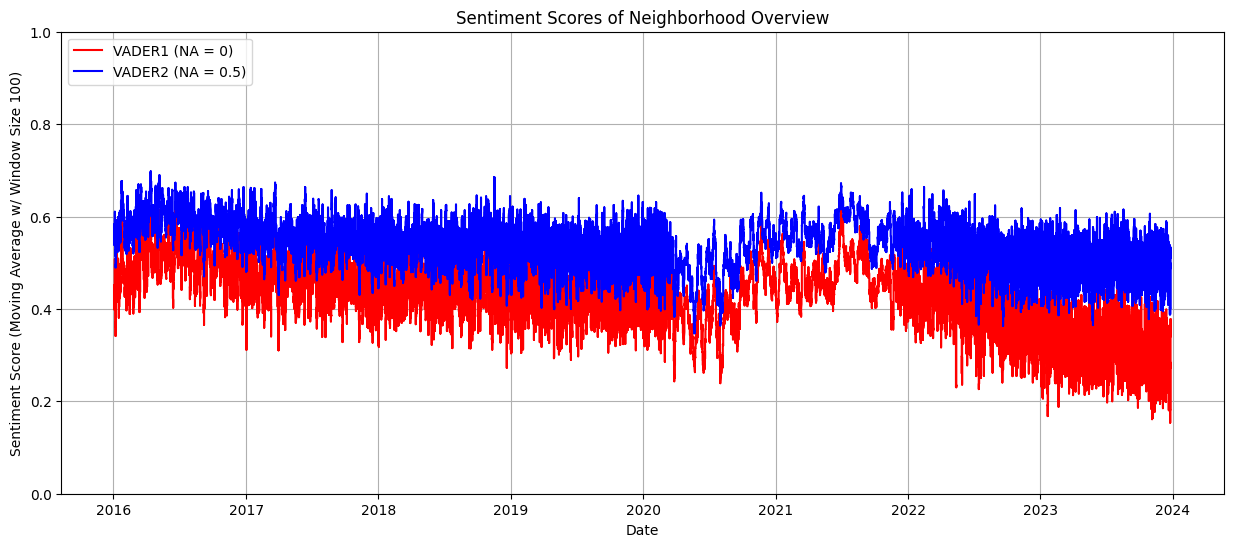

In [89]:
## Visualizing sentiment 1
import matplotlib.pyplot as plt                      # a library for visualization
# inline display of plots
%matplotlib inline

plt.figure(figsize=(15, 6))

plt.plot(dfBK.timestamp, dfBK.neighborhood_overview_VADER1.rolling(window=100).mean(), "-r", label = "VADER1 (NA = 0)")
plt.plot(dfBK.timestamp, dfBK.neighborhood_overview_VADER2.rolling(window=100).mean(), "-b", label = "VADER2 (NA = 0.5)")

plt.ylim(0, 1)
plt.legend(loc = "upper left")
plt.title("Sentiment Scores of Neighborhood Overview")
plt.xlabel("Date")
plt.ylabel("Sentiment Score (Moving Average w/ Window Size 100)")
plt.grid(axis = 'both')

plt.show()

### Term Frequency - Host About

In [15]:
### Creating a DTM
from sklearn.feature_extraction.text import CountVectorizer
import nltk

nltk_stopwords = nltk.corpus.stopwords.words("english") # Create a list of stop words from nltk (for the vectorizer to remove)
nltk_stopwords = nltk_stopwords + ["br"]
vectorizer = CountVectorizer(stop_words = nltk_stopwords, 
                                   max_df = 0.99,
                                   min_df = 0.01)

DTM_BK_HA = vectorizer.fit_transform(dfBK["host_about"])

#Check your answer:
DTM_BK_HA.shape

(246784, 392)

In [16]:
## Get term frequency ##

from collections import Counter              # for word counting

dffreq = pd.DataFrame({'Term': vectorizer.get_feature_names_out(),
                   'Frequency': DTM_BK_HA.sum(axis=0).tolist()[0]
                  })

dffreq.sort_values(by="Frequency",inplace=True,ascending=False)
dffreq.reset_index(inplace=True,drop=True)

#Check your answer:
dffreq.head(10)

,Term,Frequency
0,place,139375
1,great,116953
2,stay,112839
3,location,77186
4,clean,75616
5,good,71834
6,nice,70851
7,host,69664
8,apartment,59891
9,room,52918


#### TFIDF - Neighborhood Overview

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer2 = TfidfVectorizer(stop_words = nltk_stopwords, ngram_range = (2,2), max_df = 0.99, min_df = 0.01)
DTM_BK_HA2 = vectorizer2.fit_transform(dfBK["host_about"])
pd.DataFrame(DTM_BK_HA2.toarray(), columns = vectorizer2.get_feature_names_out())

DTM_BK_HA2.shape

(246784, 80)

In [18]:
dffreq = pd.DataFrame({'Term': vectorizer2.get_feature_names_out(),
                   'Frequency': DTM_BK_HA2.sum(axis=0).tolist()[0]
                  })

dffreq.sort_values(by="Frequency",inplace=True,ascending=False)
dffreq.reset_index(inplace=True,drop=True)

#Check your answer:
dffreq.head(10)

,Term,Frequency
0,great location,10273.487187
1,great place,9624.070226
2,place stay,9406.417519
3,highly recommend,7142.090903
4,good location,6940.933588
5,great host,6071.759956
6,nice place,5583.809701
7,great stay,5577.787112
8,walking distance,5567.020013
9,come back,5495.453701


### Sentiment Scores - BK Airbnb Host About

In [90]:
## Replace NAs with sentiment score = 0
analyzer=SentimentIntensityAnalyzer()    #Initialize VADER sentiment analyzer
dfBK["host_about_VADER1"]=[analyzer.polarity_scores(s)['compound'] if pd.notnull(s) else 0 for s in dfBK.host_about]

## Replace NAs with sentiment score = 0.5
analyzer=SentimentIntensityAnalyzer()    #Initialize VADER sentiment analyzer
dfBK["host_about_VADER2"]=[analyzer.polarity_scores(s)['compound'] if pd.notnull(s) else 0.5 for s in dfBK.host_about]

#### Sentiment Visualization - BK Host About

In [40]:
# # Set time variable
# dfBK.dropna(subset=["date"], inplace = True)
# dfBK["timestamp"] = pd.to_datetime(dfBK["date"], format="%m/%d/%y")

# dfBK.sort_values(by = ["timestamp"], ascending = True, inplace = True)
# dfBK.reset_index(drop = True, inplace = True)

# # Check time stamp
# print(dfBK["timestamp"][0:15])

0    2016-01-01
1    2016-01-01
2    2016-01-01
3    2016-01-01
4    2016-01-01
5    2016-01-01
6    2016-01-01
7    2016-01-01
8    2016-01-01
9    2016-01-01
10   2016-01-01
11   2016-01-01
12   2016-01-01
13   2016-01-01
14   2016-01-01
Name: timestamp, dtype: datetime64[ns]


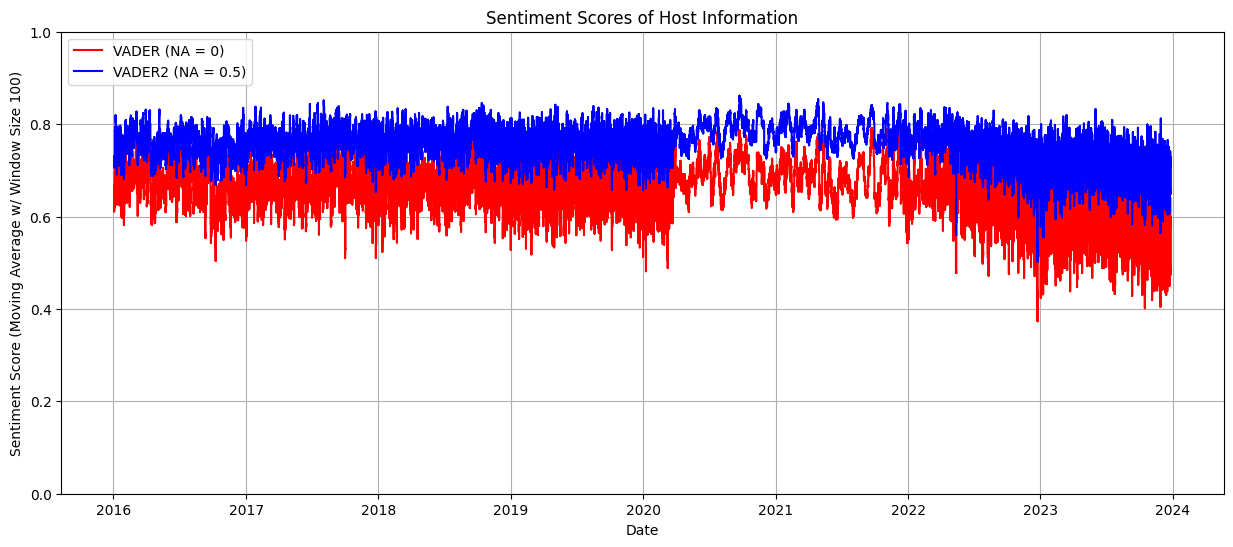

In [91]:
# Visualizing sentiment 1
import matplotlib.pyplot as plt                      # a library for visualization
# inline display of plots
%matplotlib inline

plt.figure(figsize=(15, 6))

plt.plot(dfBK.timestamp, dfBK.host_about_VADER1.rolling(window=100).mean(), "-r", label = "VADER (NA = 0)")
plt.plot(dfBK.timestamp, dfBK.host_about_VADER2.rolling(window=100).mean(), "-b", label = "VADER2 (NA = 0.5)")

plt.ylim(0, 1)
plt.legend(loc = "upper left")
plt.title("Sentiment Scores of Host Information")
plt.xlabel("Date")
plt.ylabel("Sentiment Score (Moving Average w/ Window Size 100)")
plt.grid(axis = 'both')

plt.show()

### Text Visuals - BK Neighborhood Overview & Host About

#### Sampling Data in 2023

In [20]:
# start_date = pd.to_datetime("01/01/23")
# end_date = pd.to_datetime("12/31/23")
# dfBK2023 = dfBK[(dfBK["timestamp"] >= start_date) & (dfBK["timestamp"] <= end_date)]

In [21]:
# Sample 10000 reviews in 2023 only
# dfBKsample = dfBK2023.sample(n = 10000, random_state = 2024)

#### Text Network - BK Neighborhood Overview (2023 Sample)

In [42]:
## Prepare a dataframe for textnets package
# (textnets requires the documents' names given as the row index)
dfBK_net = dfBKsample[["neighbourhood_cleansed", "neighborhood_overview"]]
dfBK_net.set_index("neighbourhood_cleansed", inplace = True)
dfBK_net

,neighborhood_overview
neighbourhood_cleansed,
Lat Krabang,highly convenient neighbor able to take a s...
Bang Rak,the house is located just off silom road the ...
Khlong Toei,sukhumvit alley 26 is considered safe alley to...
Bang Na,NaN
Ratchathewi,5 mins drive to the hottest places in bangkok...
...,...
Chatu Chak,located in ratchada where you are allowed to ...
Ratchathewi,we are ideally located in the heart of ban...
Bang Na,NaN


In [43]:
# Create a corpus & DTM for the text network
import pandas as pd
import textnets as tn

corpus = tn.Corpus(dfBK_net["neighborhood_overview"])   # convert the text in the "headlines" column into an object (called *corpus*)
DTM = corpus.tokenized()       # tokenize to convert it into a DTM (in textnet style)
DTM[0:20]

/home/tungo/.local/lib/python3.11/site-packages/textnets/corpus.py:96: UserWarning: Dropping 3607 empty document(s).
  warn(f"Dropping {missings} empty document(s).")
/home/tungo/.local/lib/python3.11/site-packages/textnets/corpus.py:99: UserWarning: There are 6349 duplicate labels. Concatenating documents.
  warn(f"There are {duplicated} duplicate labels. Concatenating documents.")


  0%|          | 0/44 [00:00<?, ?docs/s]

,term,n,term_weight
label,,,
Bang Kapi,30min,1,1.342423
Bang Kapi,airport,4,0.314476
Bang Kapi,airportlink,1,1.643453
Bang Kapi,alley,1,0.388180
Bang Kapi,amenity,1,0.529509
Bang Kapi,area,2,0.129302
Bang Kapi,away,3,0.289951
Bang Kapi,bang,3,0.782149
Bang Kapi,bangkapi,11,3.354932


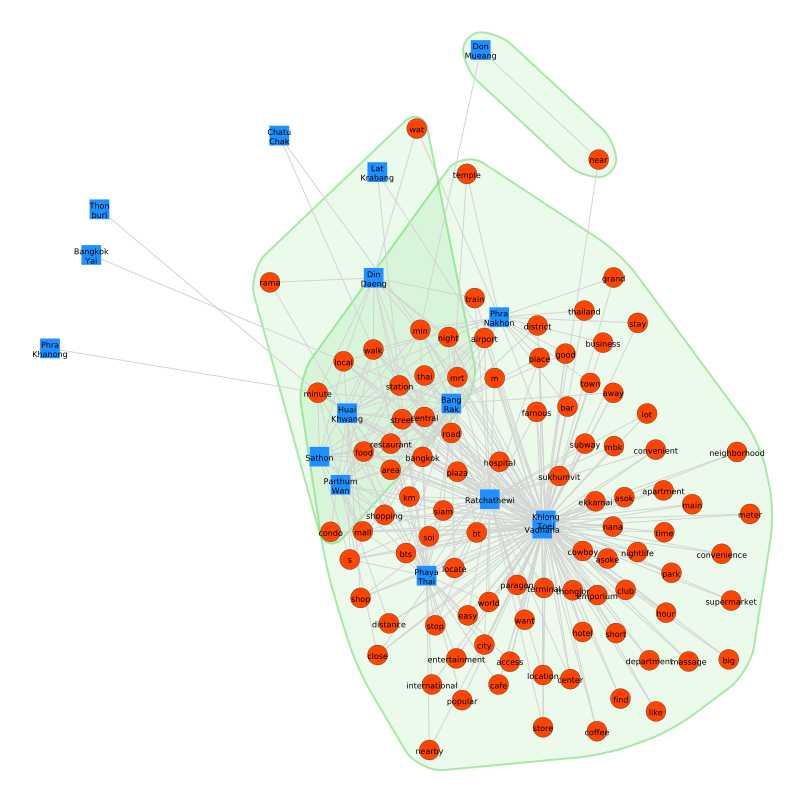

In [47]:
## Text Network (2-Mode)
tn.params["seed"] = 2024
DTM_small = DTM[(DTM["n"]>=110) & (DTM["term_weight"] > 0.2) & (DTM["term"] != "br" )] # make the DTM smaller for better visualization ## only show terms with n > 80 AND TFIDF (term weight) > 0 
net = tn.Textnet(DTM_small)
net.plot(label_term_nodes=True,
        label_doc_nodes = True,
        show_clusters = True, 
        color_clusters = False, 
        vertex_size=20,
        vertex_label_size=8, 
        edge_width=1,           # Width of edges
        edge_label_size=7,      # Size of edge labels
        #edge_color="brown",     # Color of edges
        bbox=[800,800])

#### Text Network - BK Host About

In [48]:
## Prepare a dataframe for textnets package
# (textnets requires the documents' names given as the row index)
dfBK_net = dfBKsample[["neighbourhood_cleansed", "host_about"]]
dfBK_net.set_index("neighbourhood_cleansed", inplace = True)
dfBK_net

,host_about
neighbourhood_cleansed,
Lat Krabang,NaN
Bang Rak,NaN
Khlong Toei,i am local thai but used to live and study in ...
Bang Na,hello everyone sawad dee ka and greeting f...
Ratchathewi,a chinese gymnast and coach living in bangkok ...
...,...
Chatu Chak,hello beautiful people my names kay i m an a...
Ratchathewi,we are the profession hospitality team we onl...
Bang Na,hello leon residences offer four different t...


In [49]:
# Create a corpus & DTM for the text network
import pandas as pd
import textnets as tn

corpus = tn.Corpus(dfBK_net["host_about"])   
DTM = corpus.tokenized()       # tokenize to convert it into a DTM (in textnet style)
DTM[0:20]

/home/tungo/.local/lib/python3.11/site-packages/textnets/corpus.py:96: UserWarning: Dropping 2399 empty document(s).
  warn(f"Dropping {missings} empty document(s).")
/home/tungo/.local/lib/python3.11/site-packages/textnets/corpus.py:99: UserWarning: There are 7559 duplicate labels. Concatenating documents.
  warn(f"There are {duplicated} duplicate labels. Concatenating documents.")


  0%|          | 0/42 [00:00<?, ?docs/s]

,term,n,term_weight
label,,,
Bang Kapi,accommodation,6,0.572955
Bang Kapi,accounting,1,1.623249
Bang Kapi,ago,1,0.669007
Bang Kapi,aid,1,1.322219
Bang Kapi,airbnb,5,0.224073
Bang Kapi,amenity,1,0.623249
Bang Kapi,amsterdam,3,1.508420
Bang Kapi,apartment,9,0.374991
Bang Kapi,assist,3,0.704766


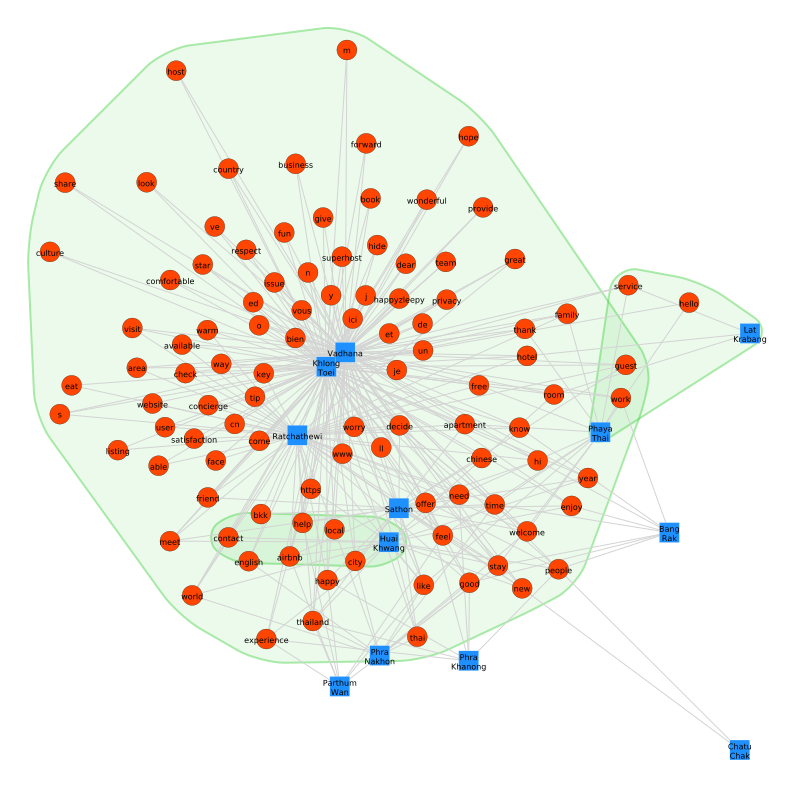

In [52]:
## Text Network (2-Mode)
tn.params["seed"] = 2024
DTM_small = DTM[(DTM["n"]>=100) & (DTM["term_weight"] > 0.2) & (DTM["term"] != "br" )] # make the DTM smaller for better visualization ## only show terms with n > 80 AND TFIDF (term weight) > 0 
net = tn.Textnet(DTM_small)
net.plot(label_term_nodes=True,
        label_doc_nodes = True,
        show_clusters = True, 
        color_clusters = False, 
        vertex_size=20,
        vertex_label_size=8, 
        edge_width=1,           # Width of edges
        edge_label_size=7,      # Size of edge labels
        #edge_color="brown",     # Color of edges
        bbox=[800,800])

### Most Negative Reviews

In [105]:
# Sampling 5000 most negative reviews
dfBK_neg = dfBK.sort_values(by='comments_VADER').head(5000)

In [108]:
dfBK_neg = dfBK_neg[dfBK_neg.neighbourhood_cleansed.isin(dfBK_neg.neighbourhood_cleansed.value_counts().index)] 
dfBK_neg.reset_index(drop=True, inplace=True)
print(dfBK_neg.neighbourhood_cleansed.value_counts())

neighbourhood_cleansed
Khlong Toei             915
Vadhana                 788
Ratchathewi             576
Sathon                  425
Huai Khwang             420
Bang Rak                325
Phaya Thai              164
Phra Khanong            150
Phra Nakhon             150
Parthum Wan             147
Chatu Chak               97
Bang Na                  91
Din Daeng                88
Khlong San               75
Bang Sue                 74
Lat Krabang              58
Suanluang                55
Pom Prap Sattru Phai     53
Bang Kapi                41
Phasi Charoen            37
Yan na wa                31
Bang Kho laen            27
Don Mueang               24
Chom Thong               24
Bang Phlat               23
Thon buri                20
Pra Wet                  20
Samphanthawong           14
Bangkok Noi              12
Lak Si                   11
Bang Khen                11
Rat Burana                9
Bueng Kum                 8
Dusit                     7
Wang Thong Lang          

In [110]:
dfBK_neg.set_index("neighbourhood_cleansed",inplace=True)
dfBK_neg.head()

,listing_id,name,neighborhood_overview,host_id,host_since,host_about,host_response_time,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,latitude,longitude,room_type,accommodates,bathrooms_text,beds,price,availability_30,availability_60,availability_365,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,id,date,comments,timestamp,host_since1,host_exp_month,comments_TextBlob,comments_VADER,neighborhood_overview_exists,host_about_exists,neighborhood_overview_VADER1,neighborhood_overview_VADER2,host_about_VADER1,host_about_VADER2
neighbourhood_cleansed,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Vadhana,35183985,Serviced apartment in Khet Watthana ¬∑ ‚òÖ3.63...,quiet neighborhood,115761116,2/10/17,NaN,within an hour,f,9,10,t,13.731908,100.582898,Entire home/apt,2,1 bath,1.0,"$1,100.00",18,28,332,16,2,3.63,3.50,3.56,3.63,3.81,3.50,6,5.351519e+17,1/8/22,avoid like the plague ...,2022-01-08,2017-02-10,59,0.011072,-0.9986,1,0,0.0000,0.0000,0.0000,0.5000
Suanluang,36439341,Townhouse in Khet Suan Luang ¬∑ ‚òÖ4.73 ¬∑ 4 b...,welcome to 420 house located in the heart of...,273965831,7/6/19,hi we are kip cartney and marc a small asi...,within an hour,t,1,1,t,13.734960,100.633180,Entire home/apt,10,3.5 baths,11.0,"$3,171.00",10,20,307,52,4,4.73,4.79,4.58,4.81,4.50,4.71,1,6.048819e+08,2/12/20,8 ...,2020-02-12,2019-07-06,7,0.005333,-0.9974,1,1,0.9891,0.9891,0.0000,0.0000
Khlong Toei,37705528,Rental unit in Khet Khlong Toei ¬∑ ‚òÖ3.95 ¬∑ ...,NaN,67585919,4/17/16,NaN,within an hour,f,137,207,t,13.716890,100.577270,Entire home/apt,6,2 baths,2.0,"$2,396.00",30,60,169,20,0,3.95,4.05,3.65,4.00,4.70,4.10,130,5.742054e+08,12/8/19,stay away starting the review at 3 stars 1...,2019-12-08,2016-04-17,44,-0.102655,-0.9956,0,0,0.0000,0.5000,0.0000,0.5000
Chatu Chak,11597585,Condo in Bangkok ¬∑ ‚òÖ4.78 ¬∑ 1 bedroom ¬∑ 1 ...,to find the exact location on the map please l...,1927968,3/15/12,hi there i m evan 36 with roots in eastern ...,within an hour,f,63,74,t,13.807709,100.572206,Entire home/apt,2,1 bath,1.0,"$1,400.00",21,51,356,74,0,4.78,4.85,4.78,4.90,4.89,4.76,48,2.758728e+08,6/12/18,not charming terrible strong pee smell hairs...,2018-06-12,2012-03-15,75,-0.197469,-0.9951,1,1,0.3182,0.3182,0.9022,0.9022
Khlong San,1412787,Rental unit in Bangkok ¬∑ ‚òÖ4.71 ¬∑ 1 bedroom...,the condo is located in thonburi area at the b...,7616231,7/21/13,hi my nickname is jeab i am originally from...,within an hour,t,1,5,t,13.721740,100.507690,Entire home/apt,4,1 bath,2.0,"$1,833.00",11,23,143,115,1,4.71,4.79,4.71,4.67,4.74,4.70,1,1.879500e+08,8/28/17,i stayed a few days days in jeab s place altho...,2017-08-28,2013-07-21,49,-0.059906,-0.9949,1,1,0.0000,0.0000,0.8625,0.8625


In [112]:
import textnets as tn
corpus = tn.Corpus(dfBK_neg["comments"])
DTM = corpus.tokenized()

#Check your answer
DTM[0:10]

/home/tungo/.local/lib/python3.11/site-packages/textnets/corpus.py:99: UserWarning: There are 4956 duplicate labels. Concatenating documents.
  warn(f"There are {duplicated} duplicate labels. Concatenating documents.")


  0%|          | 0/44 [00:00<?, ?docs/s]

,term,n,term_weight
label,,,
Bang Kapi,able,3,0.444658
Bang Kapi,absolute,1,0.529509
Bang Kapi,ac,2,0.297258
Bang Kapi,access,5,0.478642
Bang Kapi,accessibility,1,0.865301
Bang Kapi,accommodation,1,0.263241
Bang Kapi,addition,1,0.564271
Bang Kapi,address,3,0.337492
Bang Kapi,adequate,2,0.896683


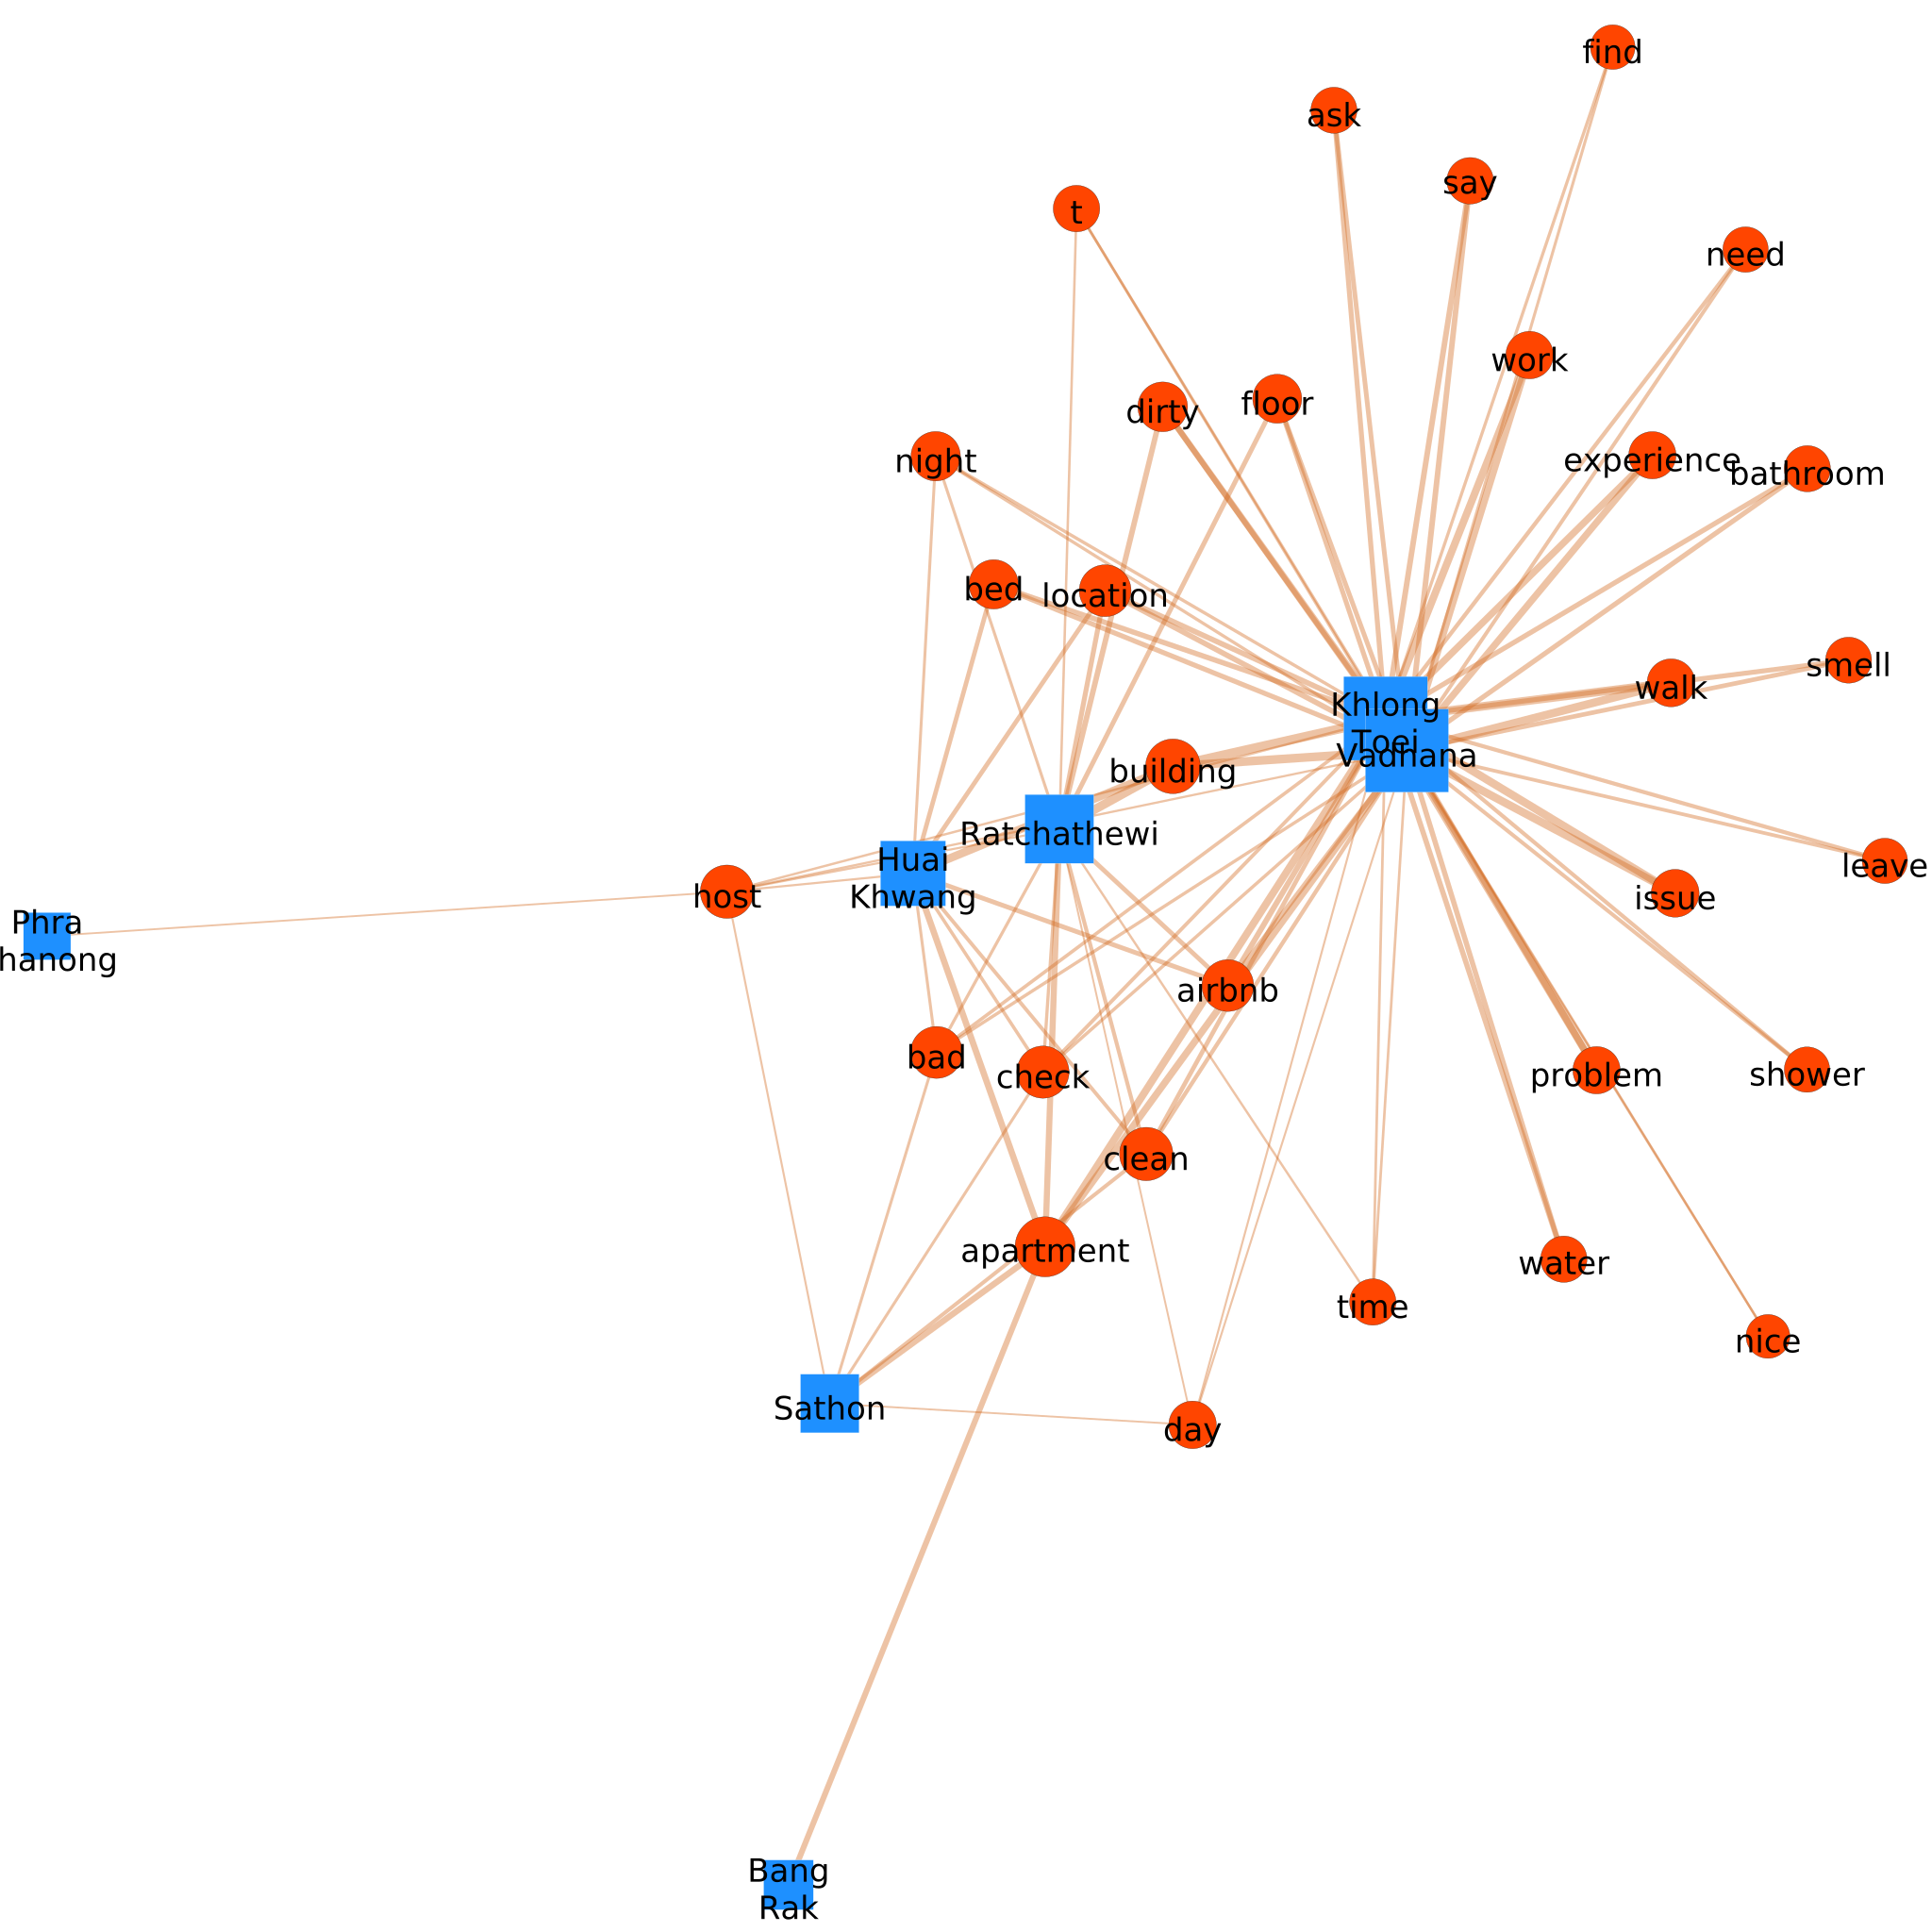

In [126]:
tn.params["seed"] = 2024
DTM_small = DTM[(DTM["n"]>=100) & (DTM["term_weight"]>0.15)] #make the DTM smaller for better visualization
net = tn.Textnet(DTM_small)
# net.plot(label_term_nodes = True,
#         label_doc_nodes = True,
#         show_clusters = True, 
#         color_clusters = False, 
#         vertex_size=5,
#         vertex_label_size=11, 
#         edge_width=3,           # Width of edges
#         edge_label_size=5,      # Size of edge labels 
#         edge_color="chocolate",     # Color of edges 
#         edge_opacity=0.2,
#         scale_nodes_by="birank",
#         scale_edges_by="weight",
#         bbox=[600,600])

net.plot(label_term_nodes=True,
        label_doc_nodes = True,
        show_clusters = True, 
        color_clusters = False, 
        vertex_size=55,
        vertex_label_size=34, 
        edge_width=6,           # Width of edges
        #edge_label_size=8,      # Size of edge labels 
        edge_color="chocolate",     # Color of edges 
        edge_opacity=0.4,
        scale_nodes_by="birank",
        scale_edges_by="weight",
        bbox=[2050,2050],  
        target="BK_network2050_neg.png")

## Analysis - Regression for BK 

In [92]:
dfBK.columns

Index(['listing_id', 'name', 'neighborhood_overview', 'host_id', 'host_since',
       'host_about', 'host_response_time', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'room_type', 'accommodates', 'bathrooms_text', 'beds',
       'price', 'availability_30', 'availability_60', 'availability_365',
       'number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count_entire_homes',
       'id', 'date', 'comments', 'timestamp', 'host_since1', 'host_exp_month',
       'comments_TextBlob', 'comments_VADER', 'neighborhood_overview_exists',
       'host_about_exists', 'neighborhood_overview_VADER1',
       'neighborhood_overview_VADER2', 'host_about_VADER1',
       'host_about_V

In [93]:
dfBK_reg = dfBK[['listing_id', 'neighborhood_overview_exists','host_about_exists','host_response_time','host_is_superhost','host_exp_month','neighborhood_overview_VADER1', 'neighborhood_overview_VADER2', 'host_about_VADER1', 'host_about_VADER2','host_total_listings_count','calculated_host_listings_count_entire_homes',
                 'price','accommodates','room_type','bathrooms_text','beds', 'availability_30','availability_60','number_of_reviews','number_of_reviews_l30d','review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness','review_scores_communication',
                 'review_scores_location','review_scores_value','id','timestamp', 'comments_TextBlob', 'comments_VADER']]
pd.set_option('display.max_columns', None)

In [56]:
dfBK_reg

,listing_id,neighborhood_overview_exists,host_about_exists,host_response_time,host_is_superhost,host_exp_month,neighborhood_overview_VADER1,neighborhood_overview_VADER2,host_about_VADER1,host_about_VADER2,host_total_listings_count,calculated_host_listings_count_entire_homes,price,accommodates,room_type,bathrooms_text,beds,availability_30,availability_60,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,id,timestamp,comments_TextBlob,comments_VADER
0,6723842,0,1,within an hour,f,7,0.0000,0.5000,0.9728,0.9728,3,1,$950.00,3,Entire home/apt,1 bath,2.0,2,16,130,0,4.88,4.91,4.92,4.93,4.53,4.86,5.814346e+07,2016-01-01,0.234939,0.9306
1,1793000,1,1,within a few hours,f,27,0.7783,0.7783,0.9719,0.9719,1,1,"$5,001.00",5,Entire home/apt,2 baths,4.0,20,32,290,0,4.85,4.90,4.88,4.87,4.73,4.75,5.813993e+07,2016-01-01,0.600000,0.7579
2,5971468,1,1,within a few hours,f,20,0.9355,0.9355,0.9274,0.9274,25,18,$450.00,2,Entire home/apt,1 bath,1.0,2,25,64,1,4.23,4.55,4.50,4.67,4.22,4.36,5.818956e+07,2016-01-01,0.194444,0.8338
3,8528401,1,1,NaN,f,7,0.9477,0.9477,0.9788,0.9788,3,0,"$1,564.00",2,Private room,1 bath,1.0,0,0,31,0,4.90,4.93,4.94,4.97,4.72,4.76,5.820443e+07,2016-01-01,0.599129,0.9786
4,6902941,1,1,NaN,f,8,0.2500,0.2500,0.9186,0.9186,2,1,"$3,000.00",6,Entire home/apt,2 baths,3.0,0,0,36,0,4.44,4.78,4.47,4.81,4.72,4.56,5.812739e+07,2016-01-01,0.149747,0.9231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246804,770846996579268639,0,1,within an hour,t,84,0.0000,0.5000,0.8885,0.8885,9,8,"$3,306.00",2,Entire home/apt,1 bath,1.0,0,0,812,74,4.96,4.95,4.93,4.98,4.89,4.91,1.055462e+18,2023-12-27,0.716667,0.9603
246805,770846996579268639,0,1,within an hour,t,84,0.0000,0.5000,0.8885,0.8885,9,8,"$3,306.00",2,Entire home/apt,1 bath,1.0,0,0,812,74,4.96,4.95,4.93,4.98,4.89,4.91,1.055459e+18,2023-12-27,0.620000,0.9358
246806,37288085,1,1,within an hour,t,89,0.9432,0.9432,0.9829,0.9829,2,1,"$9,133.00",6,Entire home/apt,3.5 baths,3.0,0,0,108,6,4.71,4.71,4.48,4.84,4.75,4.69,1.055509e+18,2023-12-27,0.301786,0.1660
246807,820896778503897920,0,1,within an hour,t,84,0.0000,0.5000,0.8885,0.8885,9,8,"$2,419.00",2,Entire home/apt,1 bath,1.0,0,0,336,33,4.93,4.93,4.90,4.97,4.84,4.91,1.055511e+18,2023-12-27,0.900000,0.0000


In [94]:
# Replace the dollar sign ('$') with an empty string ('') in the 'price' column
dfBK_reg.loc[:,'price'] = dfBK_reg['price'].str.replace('$', '')
dfBK_reg.head()

,listing_id,neighborhood_overview_exists,host_about_exists,host_response_time,host_is_superhost,host_exp_month,neighborhood_overview_VADER1,neighborhood_overview_VADER2,host_about_VADER1,host_about_VADER2,host_total_listings_count,calculated_host_listings_count_entire_homes,price,accommodates,room_type,bathrooms_text,beds,availability_30,availability_60,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,id,timestamp,comments_TextBlob,comments_VADER
0,6723842,0,1,within an hour,f,7,0.0000,0.5000,0.9728,0.9728,3,1,950.00,3,Entire home/apt,1 bath,2.0,2,16,130,0,4.88,4.91,4.92,4.93,4.53,4.86,58143460.0,2016-01-01,0.234939,0.9306
1,7777642,0,1,within an hour,t,5,0.0000,0.5000,0.4767,0.4767,3,1,"1,500.00",7,Entire home/apt,2.5 baths,7.0,13,39,403,4,4.87,4.88,4.89,4.97,4.53,4.82,58250545.0,2016-01-01,0.266422,0.9879
2,9581611,1,1,within an hour,t,2,0.9578,0.9578,0.9524,0.9524,2,2,727.00,4,Entire home/apt,1 bath,3.0,23,44,409,0,4.92,4.94,4.98,4.96,4.50,4.90,58219153.0,2016-01-01,0.263095,0.9346
3,8525403,1,1,within an hour,f,4,0.1010,0.1010,0.9032,0.9032,2,2,"1,163.00",2,Entire home/apt,1 bath,1.0,0,22,33,0,4.76,4.84,4.76,4.94,4.59,4.69,58197378.0,2016-01-01,0.469643,0.9861
4,7063763,1,0,within a few hours,t,18,0.8516,0.8516,0.0000,0.5000,1,1,"1,390.00",2,Entire home/apt,1 bath,1.0,1,1,104,1,4.85,4.88,4.75,4.94,4.75,4.83,58202037.0,2016-01-01,0.575000,0.8625


In [96]:
# create dummy variables
columns_to_dummy = ['host_is_superhost', 'host_response_time', 'room_type']

dfBK_reg = pd.get_dummies(dfBK_reg, columns=columns_to_dummy)

In [97]:
dfBK_reg

,listing_id,neighborhood_overview_exists,host_about_exists,host_exp_month,neighborhood_overview_VADER1,neighborhood_overview_VADER2,host_about_VADER1,host_about_VADER2,host_total_listings_count,calculated_host_listings_count_entire_homes,price,accommodates,bathrooms_text,beds,availability_30,availability_60,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,id,timestamp,comments_TextBlob,comments_VADER,host_is_superhost_f,host_is_superhost_t,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,6723842,0,1,7,0.0000,0.5000,0.9728,0.9728,3,1,950.00,3,1 bath,2.0,2,16,130,0,4.88,4.91,4.92,4.93,4.53,4.86,5.814346e+07,2016-01-01,0.234939,0.9306,True,False,False,False,False,True,True,False,False,False
1,7777642,0,1,5,0.0000,0.5000,0.4767,0.4767,3,1,"1,500.00",7,2.5 baths,7.0,13,39,403,4,4.87,4.88,4.89,4.97,4.53,4.82,5.825054e+07,2016-01-01,0.266422,0.9879,False,True,False,False,False,True,True,False,False,False
2,9581611,1,1,2,0.9578,0.9578,0.9524,0.9524,2,2,727.00,4,1 bath,3.0,23,44,409,0,4.92,4.94,4.98,4.96,4.50,4.90,5.821915e+07,2016-01-01,0.263095,0.9346,False,True,False,False,False,True,True,False,False,False
3,8525403,1,1,4,0.1010,0.1010,0.9032,0.9032,2,2,"1,163.00",2,1 bath,1.0,0,22,33,0,4.76,4.84,4.76,4.94,4.59,4.69,5.819738e+07,2016-01-01,0.469643,0.9861,True,False,False,False,False,True,True,False,False,False
4,7063763,1,0,18,0.8516,0.8516,0.0000,0.5000,1,1,"1,390.00",2,1 bath,1.0,1,1,104,1,4.85,4.88,4.75,4.94,4.75,4.83,5.820204e+07,2016-01-01,0.575000,0.8625,False,True,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246804,770846996579268639,0,1,84,0.0000,0.5000,0.8885,0.8885,9,8,"3,306.00",2,1 bath,1.0,0,0,812,74,4.96,4.95,4.93,4.98,4.89,4.91,1.055459e+18,2023-12-27,0.620000,0.9358,False,True,False,False,False,True,True,False,False,False
246805,37288085,1,1,89,0.9432,0.9432,0.9829,0.9829,2,1,"9,133.00",6,3.5 baths,3.0,0,0,108,6,4.71,4.71,4.48,4.84,4.75,4.69,1.055509e+18,2023-12-27,0.301786,0.1660,False,True,False,False,False,True,True,False,False,False
246806,820896778503897920,0,1,84,0.0000,0.5000,0.8885,0.8885,9,8,"2,419.00",2,1 bath,1.0,0,0,336,33,4.93,4.93,4.90,4.97,4.84,4.91,1.055511e+18,2023-12-27,0.900000,0.0000,False,True,False,False,False,True,True,False,False,False
246807,970371372369804688,1,0,4,0.0000,0.0000,0.0000,0.5000,2,2,"6,014.00",16,2.5 baths,8.0,0,0,10,5,4.82,4.64,4.91,4.91,4.91,4.82,1.055465e+18,2023-12-27,0.800000,0.6249,True,False,False,False,False,True,True,False,False,False


In [98]:
#converting last 10 columns from True/False to binary
last_10_columns = dfBK_reg.columns[-10:]

# Replace boolean values with integers (1 for True and 0 for False) for the last 10 columns
dfBK_reg[last_10_columns] = dfBK_reg[last_10_columns].replace({True: 1, False: 0})

dfBK_reg

/tmp/ipykernel_93/948577317.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfBK_reg[last_10_columns] = dfBK_reg[last_10_columns].replace({True: 1, False: 0})


,listing_id,neighborhood_overview_exists,host_about_exists,host_exp_month,neighborhood_overview_VADER1,neighborhood_overview_VADER2,host_about_VADER1,host_about_VADER2,host_total_listings_count,calculated_host_listings_count_entire_homes,price,accommodates,bathrooms_text,beds,availability_30,availability_60,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,id,timestamp,comments_TextBlob,comments_VADER,host_is_superhost_f,host_is_superhost_t,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,6723842,0,1,7,0.0000,0.5000,0.9728,0.9728,3,1,950.00,3,1 bath,2.0,2,16,130,0,4.88,4.91,4.92,4.93,4.53,4.86,5.814346e+07,2016-01-01,0.234939,0.9306,1,0,0,0,0,1,1,0,0,0
1,7777642,0,1,5,0.0000,0.5000,0.4767,0.4767,3,1,"1,500.00",7,2.5 baths,7.0,13,39,403,4,4.87,4.88,4.89,4.97,4.53,4.82,5.825054e+07,2016-01-01,0.266422,0.9879,0,1,0,0,0,1,1,0,0,0
2,9581611,1,1,2,0.9578,0.9578,0.9524,0.9524,2,2,727.00,4,1 bath,3.0,23,44,409,0,4.92,4.94,4.98,4.96,4.50,4.90,5.821915e+07,2016-01-01,0.263095,0.9346,0,1,0,0,0,1,1,0,0,0
3,8525403,1,1,4,0.1010,0.1010,0.9032,0.9032,2,2,"1,163.00",2,1 bath,1.0,0,22,33,0,4.76,4.84,4.76,4.94,4.59,4.69,5.819738e+07,2016-01-01,0.469643,0.9861,1,0,0,0,0,1,1,0,0,0
4,7063763,1,0,18,0.8516,0.8516,0.0000,0.5000,1,1,"1,390.00",2,1 bath,1.0,1,1,104,1,4.85,4.88,4.75,4.94,4.75,4.83,5.820204e+07,2016-01-01,0.575000,0.8625,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246804,770846996579268639,0,1,84,0.0000,0.5000,0.8885,0.8885,9,8,"3,306.00",2,1 bath,1.0,0,0,812,74,4.96,4.95,4.93,4.98,4.89,4.91,1.055459e+18,2023-12-27,0.620000,0.9358,0,1,0,0,0,1,1,0,0,0
246805,37288085,1,1,89,0.9432,0.9432,0.9829,0.9829,2,1,"9,133.00",6,3.5 baths,3.0,0,0,108,6,4.71,4.71,4.48,4.84,4.75,4.69,1.055509e+18,2023-12-27,0.301786,0.1660,0,1,0,0,0,1,1,0,0,0
246806,820896778503897920,0,1,84,0.0000,0.5000,0.8885,0.8885,9,8,"2,419.00",2,1 bath,1.0,0,0,336,33,4.93,4.93,4.90,4.97,4.84,4.91,1.055511e+18,2023-12-27,0.900000,0.0000,0,1,0,0,0,1,1,0,0,0
246807,970371372369804688,1,0,4,0.0000,0.0000,0.0000,0.5000,2,2,"6,014.00",16,2.5 baths,8.0,0,0,10,5,4.82,4.64,4.91,4.91,4.91,4.82,1.055465e+18,2023-12-27,0.800000,0.6249,1,0,0,0,0,1,1,0,0,0


In [99]:
# Extract numeric values using regular expressions and convert to float
dfBK_reg['bathrooms'] = dfBK_reg['bathrooms_text'].str.extract(r'(\d+\.?\d*)').astype(float)

dfBK_reg

,listing_id,neighborhood_overview_exists,host_about_exists,host_exp_month,neighborhood_overview_VADER1,neighborhood_overview_VADER2,host_about_VADER1,host_about_VADER2,host_total_listings_count,calculated_host_listings_count_entire_homes,price,accommodates,bathrooms_text,beds,availability_30,availability_60,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,id,timestamp,comments_TextBlob,comments_VADER,host_is_superhost_f,host_is_superhost_t,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bathrooms
0,6723842,0,1,7,0.0000,0.5000,0.9728,0.9728,3,1,950.00,3,1 bath,2.0,2,16,130,0,4.88,4.91,4.92,4.93,4.53,4.86,5.814346e+07,2016-01-01,0.234939,0.9306,1,0,0,0,0,1,1,0,0,0,1.0
1,7777642,0,1,5,0.0000,0.5000,0.4767,0.4767,3,1,"1,500.00",7,2.5 baths,7.0,13,39,403,4,4.87,4.88,4.89,4.97,4.53,4.82,5.825054e+07,2016-01-01,0.266422,0.9879,0,1,0,0,0,1,1,0,0,0,2.5
2,9581611,1,1,2,0.9578,0.9578,0.9524,0.9524,2,2,727.00,4,1 bath,3.0,23,44,409,0,4.92,4.94,4.98,4.96,4.50,4.90,5.821915e+07,2016-01-01,0.263095,0.9346,0,1,0,0,0,1,1,0,0,0,1.0
3,8525403,1,1,4,0.1010,0.1010,0.9032,0.9032,2,2,"1,163.00",2,1 bath,1.0,0,22,33,0,4.76,4.84,4.76,4.94,4.59,4.69,5.819738e+07,2016-01-01,0.469643,0.9861,1,0,0,0,0,1,1,0,0,0,1.0
4,7063763,1,0,18,0.8516,0.8516,0.0000,0.5000,1,1,"1,390.00",2,1 bath,1.0,1,1,104,1,4.85,4.88,4.75,4.94,4.75,4.83,5.820204e+07,2016-01-01,0.575000,0.8625,0,1,0,0,1,0,1,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246804,770846996579268639,0,1,84,0.0000,0.5000,0.8885,0.8885,9,8,"3,306.00",2,1 bath,1.0,0,0,812,74,4.96,4.95,4.93,4.98,4.89,4.91,1.055459e+18,2023-12-27,0.620000,0.9358,0,1,0,0,0,1,1,0,0,0,1.0
246805,37288085,1,1,89,0.9432,0.9432,0.9829,0.9829,2,1,"9,133.00",6,3.5 baths,3.0,0,0,108,6,4.71,4.71,4.48,4.84,4.75,4.69,1.055509e+18,2023-12-27,0.301786,0.1660,0,1,0,0,0,1,1,0,0,0,3.5
246806,820896778503897920,0,1,84,0.0000,0.5000,0.8885,0.8885,9,8,"2,419.00",2,1 bath,1.0,0,0,336,33,4.93,4.93,4.90,4.97,4.84,4.91,1.055511e+18,2023-12-27,0.900000,0.0000,0,1,0,0,0,1,1,0,0,0,1.0
246807,970371372369804688,1,0,4,0.0000,0.0000,0.0000,0.5000,2,2,"6,014.00",16,2.5 baths,8.0,0,0,10,5,4.82,4.64,4.91,4.91,4.91,4.82,1.055465e+18,2023-12-27,0.800000,0.6249,1,0,0,0,0,1,1,0,0,0,2.5


In [100]:
dfBK_reg["bathrooms"].dtype

dtype('float64')

In [102]:
dfBK_reg = dfBK_reg.drop(columns = ['bathrooms_text', 'timestamp', 'availability_60'])

In [103]:
dfBK_reg

,listing_id,neighborhood_overview_exists,host_about_exists,host_exp_month,neighborhood_overview_VADER1,neighborhood_overview_VADER2,host_about_VADER1,host_about_VADER2,host_total_listings_count,calculated_host_listings_count_entire_homes,price,accommodates,beds,availability_30,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,id,comments_TextBlob,comments_VADER,host_is_superhost_f,host_is_superhost_t,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bathrooms
0,6723842,0,1,7,0.0000,0.5000,0.9728,0.9728,3,1,950.00,3,2.0,2,130,0,4.88,4.91,4.92,4.93,4.53,4.86,5.814346e+07,0.234939,0.9306,1,0,0,0,0,1,1,0,0,0,1.0
1,7777642,0,1,5,0.0000,0.5000,0.4767,0.4767,3,1,"1,500.00",7,7.0,13,403,4,4.87,4.88,4.89,4.97,4.53,4.82,5.825054e+07,0.266422,0.9879,0,1,0,0,0,1,1,0,0,0,2.5
2,9581611,1,1,2,0.9578,0.9578,0.9524,0.9524,2,2,727.00,4,3.0,23,409,0,4.92,4.94,4.98,4.96,4.50,4.90,5.821915e+07,0.263095,0.9346,0,1,0,0,0,1,1,0,0,0,1.0
3,8525403,1,1,4,0.1010,0.1010,0.9032,0.9032,2,2,"1,163.00",2,1.0,0,33,0,4.76,4.84,4.76,4.94,4.59,4.69,5.819738e+07,0.469643,0.9861,1,0,0,0,0,1,1,0,0,0,1.0
4,7063763,1,0,18,0.8516,0.8516,0.0000,0.5000,1,1,"1,390.00",2,1.0,1,104,1,4.85,4.88,4.75,4.94,4.75,4.83,5.820204e+07,0.575000,0.8625,0,1,0,0,1,0,1,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246804,770846996579268639,0,1,84,0.0000,0.5000,0.8885,0.8885,9,8,"3,306.00",2,1.0,0,812,74,4.96,4.95,4.93,4.98,4.89,4.91,1.055459e+18,0.620000,0.9358,0,1,0,0,0,1,1,0,0,0,1.0
246805,37288085,1,1,89,0.9432,0.9432,0.9829,0.9829,2,1,"9,133.00",6,3.0,0,108,6,4.71,4.71,4.48,4.84,4.75,4.69,1.055509e+18,0.301786,0.1660,0,1,0,0,0,1,1,0,0,0,3.5
246806,820896778503897920,0,1,84,0.0000,0.5000,0.8885,0.8885,9,8,"2,419.00",2,1.0,0,336,33,4.93,4.93,4.90,4.97,4.84,4.91,1.055511e+18,0.900000,0.0000,0,1,0,0,0,1,1,0,0,0,1.0
246807,970371372369804688,1,0,4,0.0000,0.0000,0.0000,0.5000,2,2,"6,014.00",16,8.0,0,10,5,4.82,4.64,4.91,4.91,4.91,4.82,1.055465e+18,0.800000,0.6249,1,0,0,0,0,1,1,0,0,0,2.5


In [104]:
dfBK_reg.to_csv('BK_regression_data.csv', index=False)